# Data Analysis

這個檔案是想要分析整個 dataset 中不同 class 間資料的個數。首先我先用 `LabelEncoder` 把獨特的 label 取出來，並且轉成用數字表示。最後再統計不同類別各自有多少句子，並且畫出分布圖。

In [1]:
import torch
import pandas as pd
from sklearn import preprocessing
import numpy as np
import os

SPLIT = 0.8

path = os.path.join("..","data","./newdata_clean.xlsx")
df = pd.read_excel(path)

df = df.dropna() # drop nan entry
# df[pd.isnull(df).any(axis=1)]

In [2]:
le = preprocessing.LabelEncoder()
le.fit(df['catName'].unique())
num_classes = len(le.classes_)
class_list = list(le.classes_)

print(class_list)

print("number of classes:",num_classes)
df.loc[:,'catName'] = le.transform(df.loc[:,'catName'])
data = df[['question','catName']]

total = 0
stat = [0 for i in range(num_classes)]
for index,tmp in data.iterrows():
    stat[tmp['catName']] += 1
    total += 1
print(stat)
print("Total data: {}".format(total))

['Does the program support certain features?', 'Download/installation issues with Application Manager.', 'Error message pops up when I perform some action.', 'How do I …?', 'How to activate/register my product?', 'How to edit?', 'How to produce file?', 'How to set preferences/settings?', 'How to use certain effects/features?', 'I cannot install/download', 'I forget my password.', 'I have a suggestion', 'I have a suggestion.', 'I have activation problem.', 'I have activation/registration problem.', 'I have already paid, but …', 'I have component activation problem', 'I have install/uninstall/upgrade/patch problems.', 'I have other feedback', 'I have other install/uninstall problems.', 'I have other issue(s)', 'I have other membership question.', 'I have other product feature question.', 'I have other product info/feature question', 'I have other purchasing question.', 'I have other questions.', 'I have other questions/issues.', 'I have other trouble(s).', 'I have pricing/discount questi

In [3]:
import numpy as np
stat = np.array(stat)

ordered_index = stat.argsort()
stat_int = [stat[i] for i in ordered_index]
stat_percent = [stat[i] / total for i in ordered_index]
class_list = [class_list[i] for i in ordered_index]


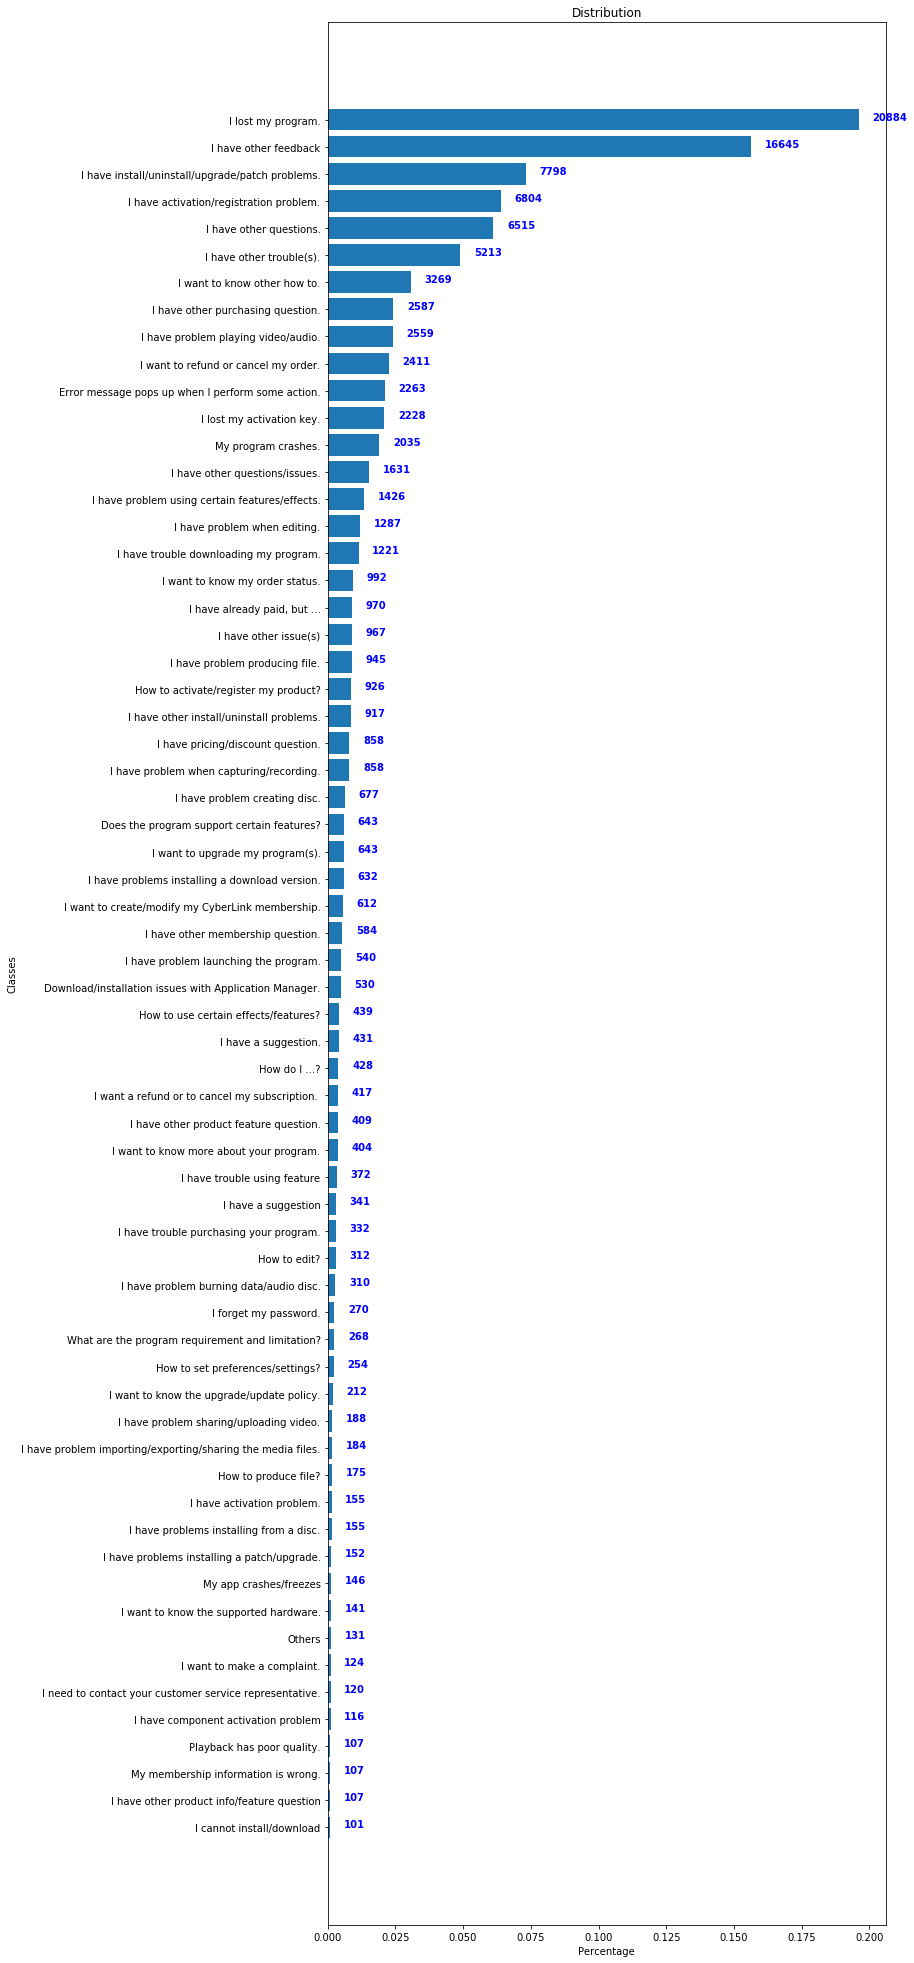

In [6]:
import matplotlib.pyplot as plt
x = [i for i in range(num_classes)]
fig, ax = plt.subplots( figsize=(10, 35))
ax.barh(x,stat_percent)
ax.set_yticks(x)
ax.set_yticklabels(class_list)
ax.set_ylabel("Classes")
ax.set_xlabel("Percentage")
ax.set_title("Distribution")

for i, n in enumerate(stat_int):
    ax.text(stat_percent[i] + 0.005, i, str(n), color='blue', fontweight='bold')
    
plt.show()

In [7]:
le2 = preprocessing.LabelEncoder()
le2.fit(df['groupName'].unique())
num_classes2 = len(le2.classes_)
class_list2 = list(le2.classes_)

print(class_list2)

print("number of classes:",num_classes2)
df.loc[:,'groupName'] = le2.transform(df.loc[:,'groupName'])
data2 = df[['question','groupName']]

total = 0
stat = [0 for i in range(num_classes2)]
for index,tmp in data2.iterrows():
    stat[tmp['groupName']] += 1
    total += 1
print(stat)
print("Total data: {}".format(total))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
number of classes: 18
[157, 10072, 2911, 4434, 7798, 103, 18592, 1485, 1766, 1573, 15, 46436, 1, 1460, 107, 812, 7987, 769]
Total data: 106478
